In [1]:
import numpy as np
import pickle
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import scipy.stats as stat
import matplotlib.pyplot as plt
from matplotlib import cm
viridis = cm.get_cmap('viridis', 8)
import dill


C:\Users\12RAM\AppData\Local\Temp\ipykernel_25560\511999277.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 8)


In [2]:
# This file makes the plots for the manuscript
# below gets the vector of SEs for the private PD median
def get_mses(d,f1,f2,tt):
    fn_mm=f1+str(d)+f2
    with open(fn_mm,"rb") as file:
        results_mm=pickle.load(file)
    ### 
    x_pdmm_norm=[]
    for i in tqdm(results_mm):
        x_pdmm,x = i
        # PD
        x_pdmm=  np.array([x.get() for x in x_pdmm])
        x_pdmm_norm=x_pdmm_norm+[np.linalg.norm(x_pdmm[x_pdmm.shape[0]-1,:])**2]
    x_pdmm_norm=np.array(x_pdmm_norm)
    return x_pdmm_norm


In [3]:
# get all the MSES, this is kind of inefficient but oh well

mses_2_2=get_mses(2,"output/delta_med_mad_results_clean_dimension_","_small_eps.pickle",'clean')
mses_2_10=get_mses(10,"output/delta_med_mad_results_clean_dimension_","_small_eps.pickle",'clean')
mses_2_20=get_mses(20,"output/delta_med_mad_results_clean_dimension_","_small_eps.pickle",'clean')

mses_5_2=get_mses(2,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')
mses_5_10=get_mses(10,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')
mses_5_20=get_mses(20,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')

mses_10_2=get_mses(2,"output/delta_med_mad_results_clean_dimension_",".pickle",'clean')
mses_10_10=get_mses(10,"output/delta_med_mad_results_clean_dimension_",".pickle",'clean')
mses_10_20=get_mses(20,"output/delta_med_mad_results_clean_dimension_",".pickle",'clean')

# print(mses_2)
# print(mses_5)
# mses_10


100%|██████████| 50/50 [00:01<00:00, 41.92it/s]


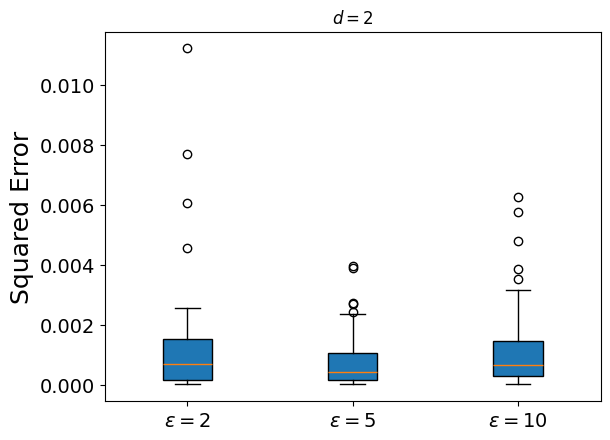

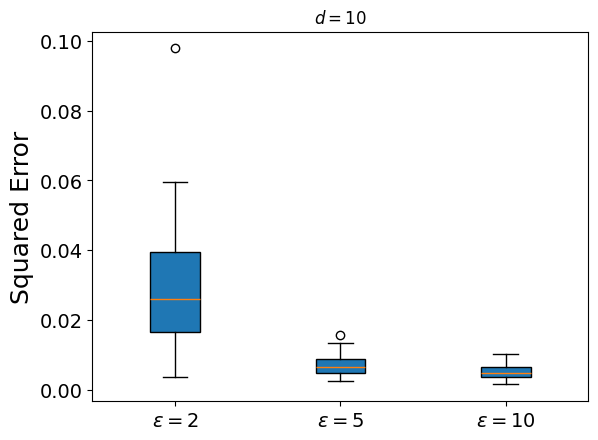

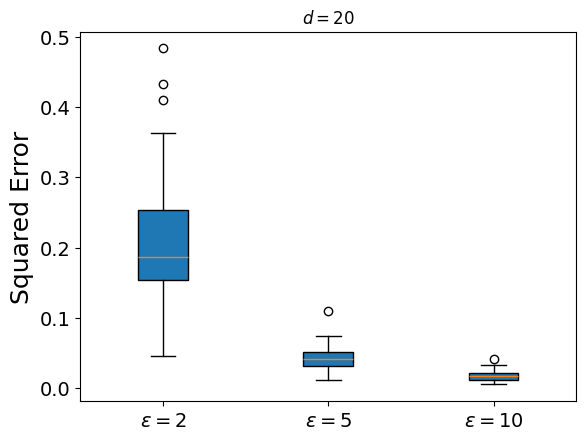

In [4]:

# plot 3 boxplots together from lists, also lazy but it works 
def plot_three_boxplots(list1, list2, list3, labels=None, title=None, fname='test.png'):
    data = [list1, list2, list3]
    if labels is None:
        labels = ["List 1", "List 2", "List 3"]

    fig, ax = plt.subplots()
    ax.boxplot(data, labels=labels, patch_artist=True )
    ax.set_ylabel("Squared Error",fontsize=18)
    plt.xticks(fontsize=14)  # x-axis tick labels  
    plt.yticks(fontsize=14)  # x-axis tick labels
    if title:
        ax.set_title(title)
    plt.savefig(fname,dpi=600, bbox_inches='tight')
    plt.show()


lab=[r'$\epsilon = 2$',r'$\epsilon = 5$', r'$\epsilon = 10$']
plot_three_boxplots(mses_2_2, mses_5_2,mses_10_2, labels=lab, title=r'$d = 2$',fname='d_2.png')
plot_three_boxplots(mses_2_10, mses_5_10,mses_10_10, labels=lab, title=r'$d = 10$',fname='d_10.png')
plot_three_boxplots(mses_2_20, mses_5_20,mses_10_20, labels=lab, title=r'$d = 20$',fname='d_20.png')

In [5]:
# do same for con
mses_2_2=get_mses(2,"output/delta_med_mad_results_con_dimension_","_small_eps.pickle",'con')
mses_2_10=get_mses(10,"output/delta_med_mad_results_con_dimension_","_small_eps.pickle",'con')
mses_2_20=get_mses(20,"output/delta_med_mad_results_con_dimension_","_small_eps.pickle",'con')

mses_5_2=get_mses(2,"output/delta_med_mad_results_con_dimension_","_med_eps.pickle",'con')
mses_5_10=get_mses(10,"output/delta_med_mad_results_con_dimension_","_med_eps.pickle",'con')
mses_5_20=get_mses(20,"output/delta_med_mad_results_con_dimension_","_med_eps.pickle",'con')

mses_10_2=get_mses(2,"output/delta_med_mad_results_con_dimension_",".pickle",'con')
mses_10_10=get_mses(10,"output/delta_med_mad_results_con_dimension_",".pickle",'con')
mses_10_20=get_mses(20,"output/delta_med_mad_results_con_dimension_",".pickle",'con')



100%|██████████| 50/50 [00:00<00:00, 93.45it/s]


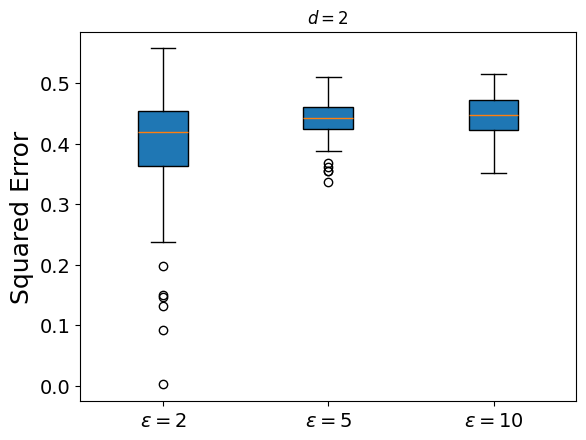

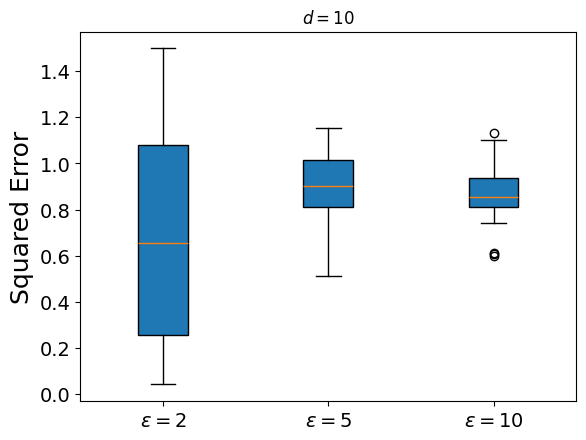

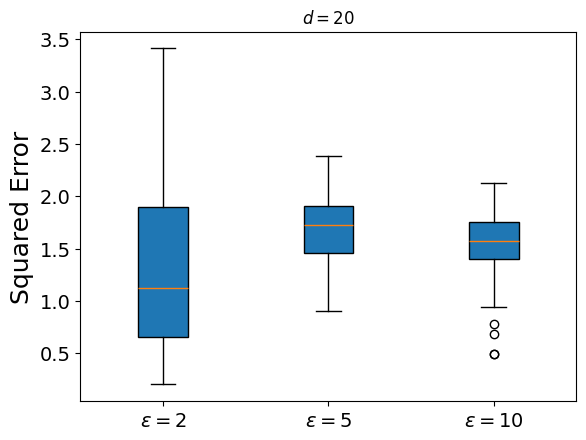

In [6]:
lab=[r'$\epsilon = 2$',r'$\epsilon = 5$', r'$\epsilon = 10$']
plot_three_boxplots(mses_2_2, mses_5_2,mses_10_2, labels=lab, title=r'$d = 2$',fname='con_d_2.png')
plot_three_boxplots(mses_2_10, mses_5_10,mses_10_10, labels=lab, title=r'$d = 10$',fname='con_d_10.png')
plot_three_boxplots(mses_2_20, mses_5_20,mses_10_20, labels=lab, title=r'$d = 20$',fname='con_d_20.png')

In [7]:
alpha=0.0
# get trimmed MSE for all estimates
def get_mse_nonp(d,f1,f2,tt):
    fn_mm=f1+str(d)+f2
    with open(fn_mm,"rb") as file:
        results_mm=pickle.load(file)
    ### 
    x_pdmm_norm=[]
    for i in tqdm(results_mm):
        pdm=i[0][len(i[0])-1]
        # PD
        pdm=np.array([x.get() for x in pdm])
        x_pdmm_norm=x_pdmm_norm+[np.linalg.norm(pdm)**2]
    # print(type(np.linalg.norm(pdm)**2))
    x_pd=np.array(x_pdmm_norm)
    x_npdmm_mse=stat.trim_mean(x_pd,alpha)
    return x_npdmm_mse


ty='clean'
# d=2
# fn=+str(d)+".pickle"
get_mse_nonp(2,"output/non_p_results_"+ty+"_dimension_",'.pickle',ty)

100%|██████████| 50/50 [00:00<?, ?it/s]


0.00019360752275539568

In [8]:
alpha=0.1
# get trimmed MSE for all median private estimates
def get_mse(d,f1,f2,tt):
    fn_mm=f1+str(d)+f2
    with open(fn_mm,"rb") as file:
        results_mm=pickle.load(file)
    ### 
    x_pdmm_norm=[]
    x_npdmm_norm=[]
    for i in tqdm(results_mm):
        x_pdmm,x_npdmm = i
        x_pdmm=i[0][len(i[0])-1]
        x_npdmm=i[1][len(i[1])-1]
        # PD
        # x_pdmm=  np.array([x.get() for x in x_pdmm])
        # x_npdmm = np.array([x.get() for x in x_npdmm])
        x_pdmm_norm=x_pdmm_norm+[np.linalg.norm(x_pdmm.get())**2]
        x_npdmm_norm=x_npdmm_norm+[np.linalg.norm(x_npdmm)**2]
        # Other

    x_pdmm_norm=np.array(x_pdmm_norm)
    x_npdmm_norm=np.array(x_npdmm_norm)

    a=stat.trim_mean(x_pdmm_norm,alpha)
    # x_np_mse=stat.trim_mean(x_np_mse,alpha)
    b=stat.trim_mean(x_npdmm_norm,alpha)
    
    return a,b




In [9]:
# initialize 
dimensions=[2,10,20]
rows=[]


In [10]:
# make list of dictionaries for all runs of the simulation and parameter combos
typpe='clean'

t_pm={'MSE': np.nan, 'Estimator':'Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npm={'MSE': np.nan, 'Estimator':'Non-Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_sidd={'MSE': np.nan, 'Estimator':'Priv. s-IDD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}

#### clean, eps=2 

for d in dimensions:
    pm,sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_small_eps.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())

#### clean, eps=5
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=5

for d in dimensions:
    pm,sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_med_eps.pickle",typpe)
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())


#### clean, eps=10
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=10

for d in dimensions:
    pm,sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_",".pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())

100%|██████████| 50/50 [00:00<00:00, 2446.80it/s]


In [11]:
# make list of dictionaries for all runs of the simulation and parameter combos
typpe='con'

t_pm={'MSE': np.nan, 'Estimator':'Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npm={'MSE': np.nan, 'Estimator':'Non-Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_sidd={'MSE': np.nan, 'Estimator':'Priv. s-IDD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}

#### clean, eps=2 

for d in dimensions:
    pm, sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_small_eps.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())

#### clean, eps=5
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=5

for d in dimensions:
    pm,sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_med_eps.pickle",typpe)
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())


#### clean, eps=10
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=10

for d in dimensions:
    pm,sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_",".pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())

100%|██████████| 50/50 [00:00<00:00, 2343.92it/s]


In [12]:
typpe='heavy'

t_pm={'MSE': np.nan, 'Estimator':'Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npm={'MSE': np.nan, 'Estimator':'Non-Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_sidd={'MSE': np.nan, 'Estimator':'Priv. s-IDD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}

#### heavy  eps=5
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=5

for d in dimensions:
    pm,sidd=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_med_eps.pickle",typpe)
    npm=get_mse_nonp(d,"output/non_p_results_"+typpe+"_dimension_",'.pickle',typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    # t_cp['MSE']=cp
    # t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    # rows.append(t_cp.copy())
    # rows.append(t_npmean.copy())


100%|██████████| 50/50 [00:00<00:00, 6020.94it/s]


In [13]:
mse_df=pd.DataFrame(rows)
mse_df.head()

,MSE,Estimator,$\epsilon$,Dist,$d$
0,0.000828,Priv. PD Median,2,clean,2
1,0.000175,Non-Priv. PD Median,2,clean,2
2,0.000930,Priv. s-IDD Median,2,clean,2
3,0.027822,Priv. PD Median,2,clean,10
4,0.000442,Non-Priv. PD Median,2,clean,10


In [14]:
df1=pd.read_pickle('means_df.pkl')
mse_df=pd.concat([mse_df, df1], ignore_index=True)

In [15]:
mse_df[mse_df["Estimator"]=='Non-Priv. Mean'].head()

,MSE,Estimator,$\epsilon$,Dist,$d$
64,0.000049,Non-Priv. Mean,2,clean,2
66,0.000049,Non-Priv. Mean,5,clean,2
68,0.000049,Non-Priv. Mean,10,clean,2
70,0.000211,Non-Priv. Mean,2,clean,10
72,0.000211,Non-Priv. Mean,5,clean,10


In [16]:
mse_df[(mse_df['$\\epsilon$']==10) &(mse_df["Estimator"]=='Priv. Mean')].head()

,MSE,Estimator,$\epsilon$,Dist,$d$
67,0.000049,Priv. Mean,10,clean,2
73,0.000985,Priv. Mean,10,clean,10
79,0.000838,Priv. Mean,10,clean,20
85,2.049406,Priv. Mean,10,con,2
91,7.611875,Priv. Mean,10,con,10


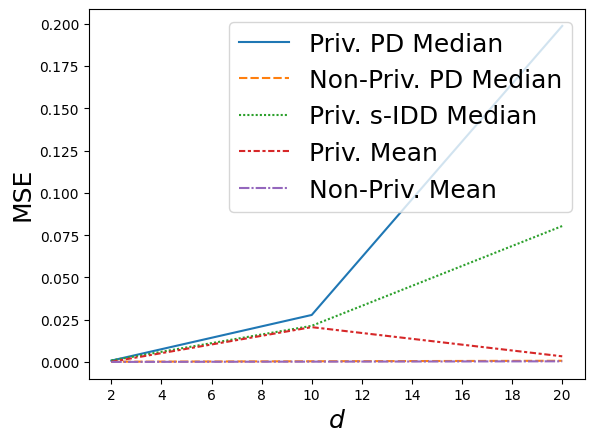

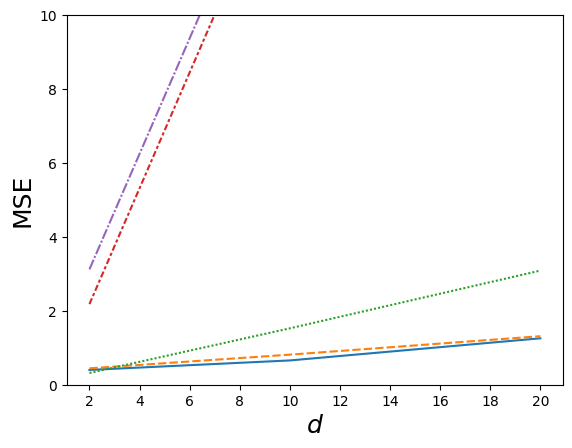

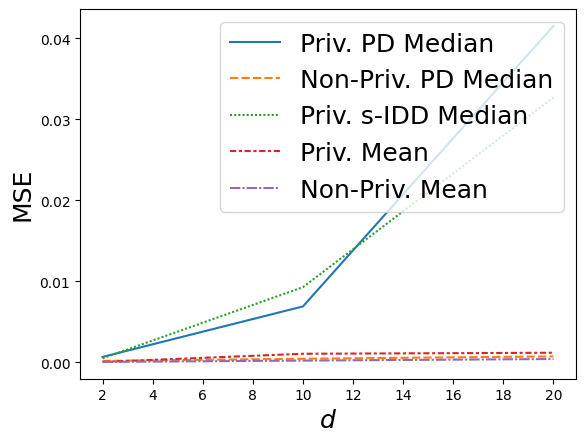

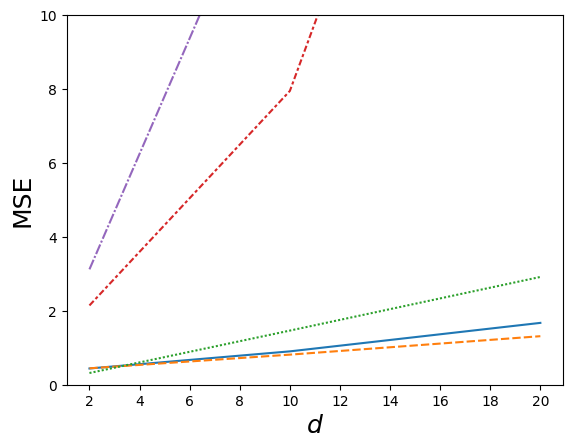

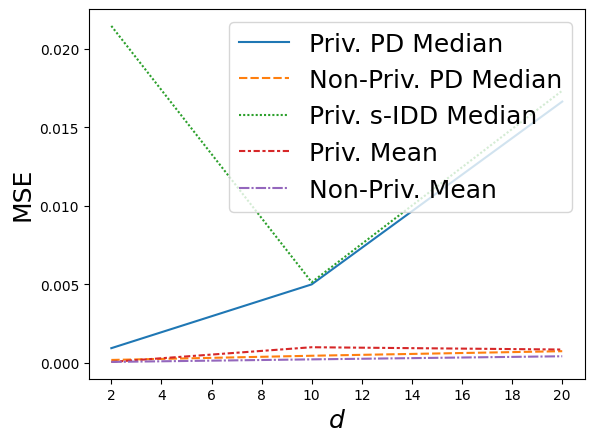

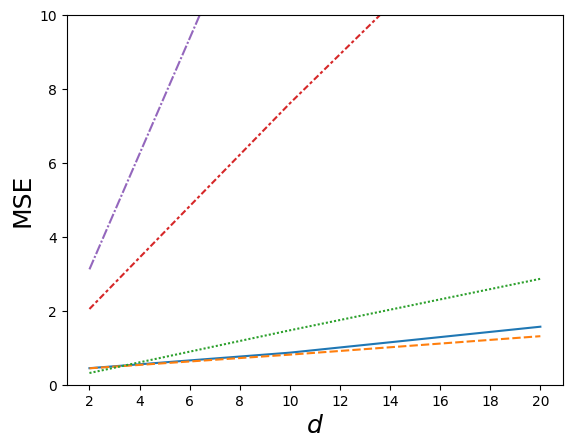

In [23]:
def make_plots(eps):
    ax = sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==eps) & (mse_df['Dist']=='clean')],
                x=r'$d$',y="MSE",hue="Estimator", style="Estimator")
    # ax.set_ylim(0,0.2)
    ax.set_xlabel( r'$d$',fontsize=18)
    ax.set_ylabel("MSE" ,fontsize=18)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(loc='upper right',fontsize=18)
    fname="CLEAN_Trimmed_MSE_"+str(eps)+".png"
    plt.savefig(fname,dpi=600, bbox_inches='tight')
    plt.show()

    ax=sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==eps) & (mse_df['Dist']=='con')],x=r'$d$',y="MSE",hue="Estimator", style="Estimator")
    ax.set_ylim(0,10)
    leg = ax.get_legend()
    leg.set_visible(False)
    ax.set_xlabel( r'$d$',fontsize=18)
    ax.set_ylabel("MSE" ,fontsize=18)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    fname="CON_Trimmed_MSE_Eps_"+str(eps)+".png"
    plt.savefig(fname,dpi=600, bbox_inches='tight')
    plt.show()
make_plots(2)
make_plots(5)
make_plots(10)

# 

In [18]:
mse_df[(mse_df['$\\epsilon$']==2) & (mse_df['Dist']=='con')& (mse_df['Estimator']=='Priv. PD Median')]


,MSE,Estimator,$\epsilon$,Dist,$d$
27,0.400230,Priv. PD Median,2,con,2
30,0.657042,Priv. PD Median,2,con,10
33,1.255974,Priv. PD Median,2,con,20


In [19]:
mse_df[(mse_df['$\\epsilon$']==10) & (mse_df['Dist']=='con')& (mse_df['Estimator']=='Priv. PD Median')]

,MSE,Estimator,$\epsilon$,Dist,$d$
45,0.447577,Priv. PD Median,10,con,2
48,0.867475,Priv. PD Median,10,con,10
51,1.569641,Priv. PD Median,10,con,20


In [20]:
mse_df[(mse_df['$\\epsilon$']==5) & (mse_df['Dist']=='con')& (mse_df['Estimator']=='Priv. PD Median')]


,MSE,Estimator,$\epsilon$,Dist,$d$
36,0.439512,Priv. PD Median,5,con,2
39,0.902488,Priv. PD Median,5,con,10
42,1.673109,Priv. PD Median,5,con,20


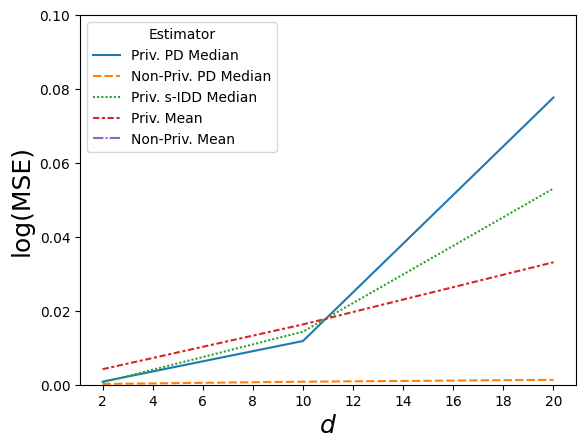

In [21]:
mse_df['lm']=np.log(mse_df['MSE'])
# ax=sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==5) & (mse_df['Dist']=='heavy')],
# x=r'$d$',y="lm",hue="Estimator", style="Estimator")
ax=sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==5) & (mse_df['Dist']=='heavy')],
x=r'$d$',y="MSE",hue="Estimator", style="Estimator")
ax.set_ylim(0,0.1)
# leg = ax.get_legend()
# leg.set_visible(False)
# ax.legend(loc='upper right',fontsize=18)
ax.set_xlabel( r'$d$',fontsize=18)
ax.set_ylabel("log(MSE)" ,fontsize=18)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

fname="Heavy_Trimmed_MSE_Eps_5.png"
plt.savefig(fname,dpi=600, bbox_inches='tight')
plt.show()

In [22]:
# alpha=0.02
# # get trimmed MSE for all estimates
# def get_mse_cp(d,f1,f2,tt):
#     fn_mm=f1+str(d)+f2
#     with open(fn_mm,"rb") as file:
#         results_mm=pickle.load(file)
#     ### 
#     x_cp_mse=[]
#     for i in tqdm(results_mm):
#         x_pdmm,x_npdmm,x_p,x_np,x_cp = i
#         x_cp = np.array(x_cp)
#         x_cp_mse=x_cp_mse+[np.linalg.norm(x_cp)**2]
#     x_cp_mse=stat.trim_mean(x_cp_mse,alpha)

#     fn_m="output/sm_results_"+tt+"_dimension_"+str(d)+".pickle"
#     with open(fn_m,"rb") as file:
#         results_mean=pickle.load(file)
#     x_npm_mse=stat.trim_mean(np.apply_along_axis(np.linalg.norm, 1, results_mean)**2,alpha)
#     print(len(np.apply_along_axis(np.linalg.norm, 1, results_mean)**2))
#     return x_cp_mse, x_npm_mse

# cp,npmean=get_mse_cp(20,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')

# print(cp)
# print(npmean)